In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
from __future__ import print_function

In [ ]:
import pandas as pd 

path = '/content/drive/My Drive/Datasets/Data/'

first = pd.read_csv(path+"Rpl3.csv", sep=",", header=None, names=['x', 'y'])
second = pd.read_csv(path+"Rpl3T.csv", sep=",", header=None, names=['x', 'y'])
first['z'] = 0
second['z'] = 0

third = pd.read_csv(path+"Rpl4.csv", sep=",", header=None, names=['x', 'y'])
fourth = pd.read_csv(path+"Rpl4T.csv", sep=",", header=None, names=['x', 'y'])
third['z'] = 0
fourth['z'] = 0

fifth = pd.read_csv(path+"Rpl5.csv", sep=",", header=None, names=['x', 'y'])
sixth = pd.read_csv(path+"Rpl5T.csv", sep=",", header=None, names=['x', 'y'])
fifth['z'] = 0
sixth['z'] = 0


In [ ]:
sixth.tail()


,x,y,z
290,-546.803415,199.323920,0
291,-522.317311,204.708639,0
292,-362.758596,173.234526,0
293,-364.116260,177.325545,0
294,-361.071458,181.227488,0


In [ ]:
!ls -l "/content/drive/My Drive/Datasets/Data"

total 95
-rw------- 1 root root  7451 Mar 29 15:43 Rpl1.csv
-rw------- 1 root root  7447 Mar 29 15:43 Rpl1T.csv
-rw------- 1 root root  6974 Mar 29 15:43 Rpl2.csv
-rw------- 1 root root  6993 Mar 29 15:43 Rpl2T.csv
-rw------- 1 root root 11462 Mar 31 17:33 Rpl3.csv
-rw------- 1 root root 11648 Mar 31 17:33 Rpl3T.csv
-rw------- 1 root root 10759 Mar 31 19:51 Rpl4.csv
-rw------- 1 root root 10723 Mar 31 19:48 Rpl4T.csv
-rw------- 1 root root 10460 Mar 31 20:04 Rpl5.csv
-rw------- 1 root root 10666 Mar 31 20:06 Rpl5T.csv


In [ ]:
import numpy as np
Am = np.matrix(first.to_numpy())
Bm = np.matrix(second.to_numpy())

Cm = np.matrix(third.to_numpy())
Dm = np.matrix(fourth.to_numpy())

Em = np.matrix(fifth.to_numpy())
Fm = np.matrix(sixth.to_numpy())

In [ ]:
Em.shape

(295, 3)

"\n#ax3.set_title(' - Rotate(improved data) ')\nplt.plot(Am[:,0],Am[:,1],'r+')\nplt.plot(Bm[:,0],Bm[:,1],'b+')\n"

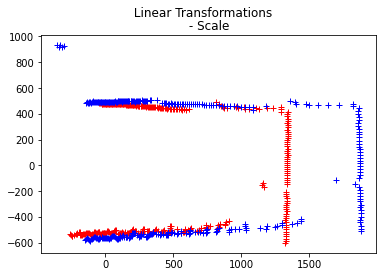

In [ ]:
import matplotlib.pylab as plt

fig, (ax2) = plt.subplots(1, gridspec_kw={'hspace': 1})
fig.suptitle(' Linear Transformations ')
'''
ax1.set_title( '- Rd1 Rotate')
ax1.plot(Am[:,0],Am[:,1],'r+')
ax1.plot(Bm[:,0],Bm[:,1],'b+')
'''
ax2.set_title(' - Scale ')
ax2.plot(Cm[:,0],Cm[:,1],'r+')
ax2.plot(Dm[:,0],Dm[:,1],'b+')
'''
#ax3.set_title(' - Rotate(improved data) ')
plt.plot(Am[:,0],Am[:,1],'r+')
plt.plot(Bm[:,0],Bm[:,1],'b+')
'''

http://nghiaho.com/?page_id=671

https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d

In [ ]:
# Steps Involve accumulating a matrix, called H, and using SVD to find the rotation as follows:
# H = (A - centroid_A)(B - centroid_B)(transposed)
# [U,S,V] = SVD(H) 
# R = VU(transposed)

from math import sqrt

# Input: expects 3xN matrix of points
# Returns R,t
# R = 3x3 rotation matrix
# t = 3x1 column vector

def rigid_transform_3D(A, B):
    assert len(A) == len(B)

    num_rows, num_cols = A.shape;

    if num_rows != 3:
        raise Exception("matrix A is not 3xN, it is {}x{}".format(num_rows, num_cols))

    [num_rows, num_cols] = B.shape;
    if num_rows != 3:
        raise Exception("matrix B is not 3xN, it is {}x{}".format(num_rows, num_cols))

    # find mean column wise
    centroid_A = np.mean(A, axis=1)
    centroid_B = np.mean(B, axis=1)

    #print (centroid_A)
    #print (A - np.tile(centroid_A, (1, num_cols)))

    # subtract mean
    Am = A - np.tile(centroid_A, (1, num_cols))
    Bm = B - np.tile(centroid_B, (1, num_cols))

    H = Am * Bm.T

    # sanity check
    #if linalg.matrix_rank(H) < 3:
    #    raise ValueError("rank of H = {}, expecting 3".format(linalg.matrix_rank(H)))

    # find rotation
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T * U.T

    # special reflection case
    if np.linalg.det(R) < 0:
        print("det(R) < R, reflection detected!, correcting for it ...\n");
        Vt[2,:] *= -1
        R = Vt.T * U.T

    t = -R*centroid_A + centroid_B
  

    return R, t


In [ ]:
from math import atan, degrees, sqrt

# Recover R and t
#print(np.matrix('1, 2, 0'))
#ret_R, ret_t = rigid_transform_3D(np.matrix('1,2; 4,-6; 0,0'), np.matrix('-0.89442719,  0.4472136 ;0.83205029,0.5547002; 0,0'))

ret_R, ret_t = rigid_transform_3D(Em.T,Fm.T)

print("Recovered rotation")
print(ret_R)
print("")

num = ret_R[1, 0]
den = ret_R[0,0]

print("Recovered rotation in degrees") 
print('atan : ', num, den)
rotation = atan(ret_R[0,1] / ret_R[1,1])
print(degrees(rotation), "degrees")

print("Recovered translation")
print(ret_t)
print("")

Recovered rotation
[[ 0.27541754  0.9613247   0.        ]
 [-0.9613247   0.27541754  0.        ]
 [ 0.          0.          1.        ]]

Recovered rotation in degrees
atan :  -0.96132469891888 0.2754175434654174
74.01310143461882 degrees
Recovered translation
[[-191.18505101]
 [ -24.30738779]
 [   0.        ]]



In [ ]:
from math import atan, degrees, sqrt
num = ret_R[1, 0]
den = ret_R[0,0]
 
print('element at row index 1 & column index 2 is : ', num, den)
rotation = atan(ret_R[1,0] / ret_R[0,0])
print(degrees(rotation))


element at row index 1 & column index 2 is :  -0.96132469891888 0.2754175434654174
-74.0131014346188


In [ ]:
# Test with random data

# Random rotation and translation
R = np.mat(np.random.rand(3,3))
t = np.mat(np.random.rand(3,1))

# make R a proper rotation matrix, force orthonormal
U, S, Vt = np.linalg.svd(R)
R = U*Vt

# remove reflection
if np.linalg.det(R) < 0:
   Vt[2,:] *= -1
   R = U*Vt

# number of points
n = 10

A = np.mat(np.random.rand(3, n));
B = R*A + np.tile(t, (1, n))

# Recover R and t
ret_R, ret_t = rigid_transform_3D(A, B)

# Compare the recovered R and t with the original
B2 = (ret_R*A) + np.tile(ret_t, (1, n))

# Find the root mean squared error
err = B2 - B
err = np.multiply(err, err)
err = np.sum(err)
rmse = sqrt(err/n);

print("Points A")
print(A)
print("")

print("Points B")
print(B)
print("")

print("Ground truth rotation")
print(R)

print("Recovered rotation")
print(ret_R)
print("")

print("Ground truth translation")
print(t)

print("Recovered translation")
print(ret_t)
print("")

print("RMSE:", rmse)

if rmse < 1e-5:
    print("Everything looks good!\n");
else:
    print("Hmm something doesn't look right ...\n");

Points A
[[0.15586773 0.27847628 0.34399622 0.91560205 0.78469802 0.59280246
  0.71034907 0.55981881 0.34572286 0.45629201]
 [0.8946508  0.06777365 0.87459193 0.25536619 0.76185706 0.80224697
  0.86002227 0.41452214 0.41541903 0.44127808]
 [0.06721259 0.1232117  0.07427265 0.37287792 0.52015712 0.27226395
  0.53301426 0.72256516 0.69965825 0.58117602]]

Points B
[[1.10333261 1.21571934 1.28571386 1.78371789 1.62155851 1.48685457
  1.5456369  1.36054481 1.15628936 1.28948047]
 [1.64892381 0.83739944 1.63540614 1.07049501 1.58605517 1.59294206
  1.68277347 1.25674811 1.2486964  1.26454766]
 [0.40089793 0.57608924 0.44987632 0.93175416 0.98886894 0.70301286
  0.97434452 1.17757488 1.1099178  1.01536024]]

Ground truth rotation
[[ 0.9768801  -0.00553987 -0.21371613]
 [ 0.02990109  0.9933788   0.11092557]
 [ 0.21168656 -0.11475132  0.97057763]]
Recovered rotation
[[ 0.9768801  -0.00553987 -0.21371613]
 [ 0.02990109  0.9933788   0.11092557]
 [ 0.21168656 -0.11475132  0.97057763]]

Ground tru

https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/geometry/geo-tran.html

In [ ]:
import numpy as np

def perpendicular( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)

a = [458.8, 82.172]
print (perpendicular(normalize(a)))
  

[-0.17629674  0.98433707]


In [ ]:
A = np.array([
[50.93, 204.53, 0],
[87.188, 1279.8, 0],
[237.19, 600.8, 0],
[378.9, 1601.8, 0],
[458.8, 82.172, 0]]
)

B = np.array([
[54.005, 204.5, 0],
[90.51, 1282.2, 0],
[240.72, 600.69, 0],
[382.59, 1601.9, 0],
[462.01, 81.683, 0]]
)

C = np.array([
 [-0.97036813, 0.2416313, 0 ], 
 [-0.99768745,  0.06796872, 0],
 [-0.93013825 , 0.36720954, 0],
 [-0.97314479 , 0.23019388, 0], 
 [-0.17629674 , 0.98433707,0]  ])

Am = np.matrix(A.T)
Bm = np.matrix(B.T)

print(Am)

[[  50.93    87.188  237.19   378.9    458.8  ]
 [ 204.53  1279.8    600.8   1601.8     82.172]
 [   0.       0.       0.       0.       0.   ]]


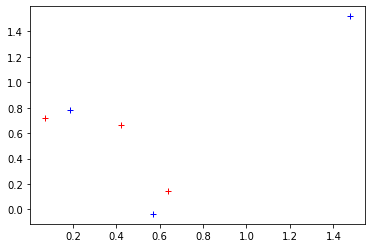

In [ ]:
import matplotlib.pylab as plt
plt.plot(A[:,0],A[:,1],'r+')
plt.plot(B[:,0],B[:,1],'b+')